In [9]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
import matplotlib.pyplot as plt

In [2]:
chroma_client = chromadb.PersistentClient(path='./image_db')

In [3]:
img_loader = ImageLoader()

multimodal_embedding_funct = OpenCLIPEmbeddingFunction()

multimodal_db = chroma_client.get_or_create_collection(
    name='multimodal_db',
    embedding_function=multimodal_embedding_funct,
    data_loader=img_loader)

c:\Users\ravin\anaconda3\envs\ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ravin\anaconda3\envs\ai\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ravin\.cache\huggingface\hub\models--laion--CLIP-ViT-B-32-laion2B-s34B-b79K. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to act

In [ ]:
multimodal_db.add(
    ids=['0', '1'],
    uris=['images/lion.jpg', 'images/tiger.jpg'],
    metadatas=[
        {"item_id": "0", "img_category":"animal", "item_name": "lion"},
        {"item_id": "1", "img_category":"animal", "item_name": "tiger"},
    ],
)

In [ ]:
multimodal_db.add(
    ids=["E23", "E25", "E33"],
    uris=["images/E23-2.jpg", "images/E25-2.jpg", "images/E33-2.jpg"],
    metadatas=[
        {"item_id": "E23", "img_category":"food", "item_name": "Brised Fried Tofu with greens"},
        {"item_id": "E25", "img_category":"food", "item_name": "Sauteed Assorted Vegetables"},
        {"item_id": "E33", "img_category":"food", "item_name": "Kung Pao Tofu"},
    ],
)

In [15]:
multimodal_db.count()

5

In [ ]:
def print_query_results(query_list, query_results):
    result_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'Results for query : {query_list[i]}')

        for j in range(result_count):
            id = query_results['ids'][i][j]
            distance = query_results['distances'][i][j]
            data = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri = query_results['uris'][i][j]

            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}')

            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis('off')
            plt.show()

Results for query : lion
id: 0, distance: 1.4490113242575118, metadata: {'img_category': 'animal', 'item_id': '0', 'item_name': 'lion'}, document: None
data: images/lion.jpg


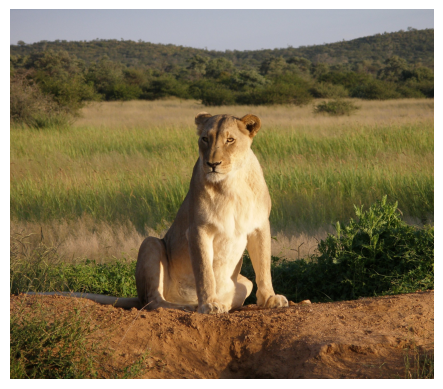

id: 1, distance: 1.5884432641155657, metadata: {'img_category': 'animal', 'item_id': '1', 'item_name': 'tiger'}, document: None
data: images/tiger.jpg


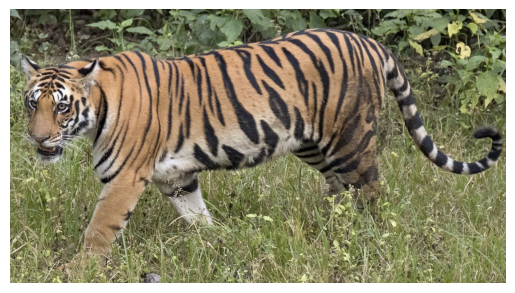

In [25]:
query_texts=['lion']

query_results = multimodal_db.query(
    query_texts=query_texts,
    n_results=5,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'animal'}
)

print_query_results(query_texts, query_results)